In [44]:
import os
# !pip install google-cloud-vision
from google.cloud import vision
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'peak-tract-424210-t2-5a5aee9984a6.json'
import cv2
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
def extract_text_from_image(image_path):
    client = vision.ImageAnnotatorClient()

    with open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    response = client.text_detection(image=image)

    if response.error.message:
        raise Exception(response.error.message)
    
    return response

In [4]:
img_name = 'triangle'
img_path = f'./images/{img_name}.png'

In [5]:
response = extract_text_from_image(img_path)

In [6]:
texts = response.text_annotations
print(texts)

[locale: "en"
description: "Q. 1: In the given figure, PS/SQ = PT/TR and 2 PST = 2 PRQ. Prove that PQR is an\nisosceles triangle.\nT\nR"
bounding_poly {
  vertices {
    x: 34
    y: 7
  }
  vertices {
    x: 1153
    y: 7
  }
  vertices {
    x: 1153
    y: 677
  }
  vertices {
    x: 34
    y: 677
  }
}
, description: "Q."
bounding_poly {
  vertices {
    x: 35
    y: 16
  }
  vertices {
    x: 67
    y: 16
  }
  vertices {
    x: 67
    y: 49
  }
  vertices {
    x: 35
    y: 49
  }
}
, description: "1"
bounding_poly {
  vertices {
    x: 72
    y: 16
  }
  vertices {
    x: 82
    y: 16
  }
  vertices {
    x: 82
    y: 49
  }
  vertices {
    x: 72
    y: 49
  }
}
, description: ":"
bounding_poly {
  vertices {
    x: 84
    y: 16
  }
  vertices {
    x: 92
    y: 16
  }
  vertices {
    x: 92
    y: 49
  }
  vertices {
    x: 84
    y: 49
  }
}
, description: "In"
bounding_poly {
  vertices {
    x: 97
    y: 16
  }
  vertices {
    x: 123
    y: 16
  }
  vertices {
    x: 123
  

In [46]:
def fill_bounding_boxes(image, texts):
    bounding_boxes = []
    for text in texts[1:]:
        vertices = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]
        bounding_boxes.append(vertices)

    for box in bounding_boxes:
        x_coords = [vertex[0] for vertex in box]
        y_coords = [vertex[1] for vertex in box]

        margin = 5
        x_min, x_max = max(min(x_coords) - margin, 0), min(max(x_coords) + margin, image.shape[1])
        y_min, y_max = max(min(y_coords) - margin, 0), min(max(y_coords) + margin, image.shape[0])

        surrounding_area = image[y_min:y_max, x_min:x_max]
        avg_color = np.mean(surrounding_area, axis=(0, 1)).astype(int)
        cv2.fillPoly(image, [np.array(box, np.int32)], avg_color.tolist())
    return image

In [63]:
from collections import Counter
def most_common_color(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image_rgb.reshape(-1, 3)
    color_counts = Counter(map(tuple, pixels))
    max_color, max_count = color_counts.most_common(1)[0]
    return max_color

uniq_color:  (255, 255, 0)


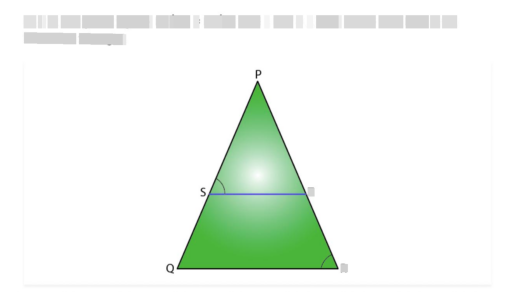

fill_color:  (255, 255, 255) <class 'tuple'>


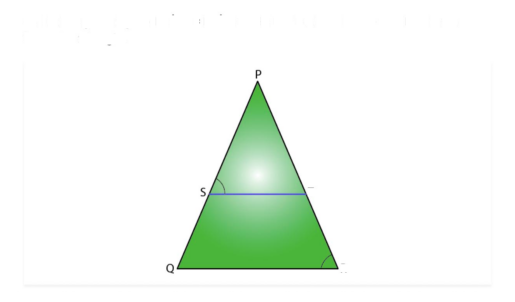

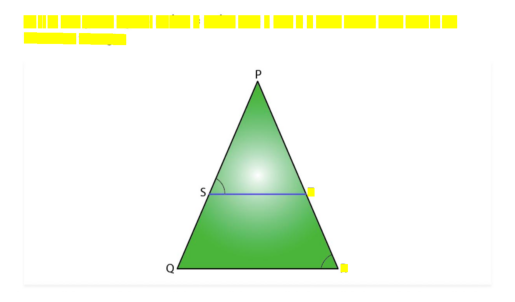

[[(35, 16), (67, 16), (67, 49), (35, 49)], [(72, 16), (82, 16), (82, 49), (72, 49)], [(84, 16), (92, 16), (92, 49), (84, 49)], [(97, 16), (123, 16), (123, 49), (97, 49)], [(131, 16), (181, 16), (181, 49), (131, 49)], [(186, 16), (267, 16), (267, 49), (186, 49)], [(275, 16), (359, 16), (359, 49), (275, 49)], [(361, 16), (367, 16), (367, 49), (361, 49)], [(377, 16), (409, 16), (409, 49), (377, 49)], [(411, 16), (424, 16), (424, 49), (411, 49)], [(424, 16), (464, 16), (464, 49), (424, 49)], [(473, 16), (488, 16), (488, 49), (473, 49)], [(501, 16), (533, 16), (533, 49), (501, 49)], [(533, 16), (549, 16), (549, 49), (533, 49)], [(548, 16), (581, 16), (581, 49), (548, 49)], [(589, 16), (645, 16), (645, 49), (589, 49)], [(656, 16), (669, 16), (669, 49), (656, 49)], [(680, 16), (730, 16), (730, 49), (680, 49)], [(738, 16), (755, 16), (755, 49), (738, 49)], [(766, 16), (781, 16), (781, 49), (766, 49)], [(790, 16), (848, 16), (848, 49), (790, 49)], [(848, 16), (855, 16), (855, 49), (848, 49)], [

In [66]:
image = cv2.imread(img_path)

uniq_image = image.copy()
unique_colors = set(tuple(v) for m2d in uniq_image for v in m2d)
for r in range(256):
    for g in range(256):
        for b in range(256):
            if (r, g, b) not in unique_colors:
                break
uniq_color = (r, g, b)
print("uniq_color: ", uniq_color)

fill_image = image.copy()
fill_color = most_common_color(fill_image)
fill_color = tuple(map(int, fill_color))
print("fill_color: ", fill_color)
for text in texts[1:]:
    vertices = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]
    cv2.fillPoly(fill_image, [np.array(vertices, np.int32)], fill_color)
plt.imshow(fill_image, cmap='gray')
plt.axis('off')
plt.show()

temp_image = image.copy()
excluded_boxes = []
for text in texts[1:]:
    vertices = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]
    cv2.fillPoly(temp_image, [np.array(vertices, np.int32)], (r, g, b))
    excluded_boxes.append(vertices)

plt.imshow(temp_image, cmap='gray')
plt.axis('off')
plt.show()
mask_img_path = "temp_image/mask_img.png"
cv2.imwrite(mask_img_path, temp_image)
print(excluded_boxes)

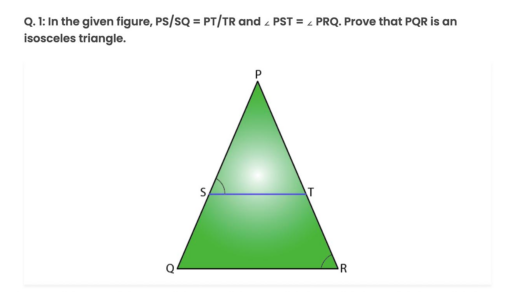

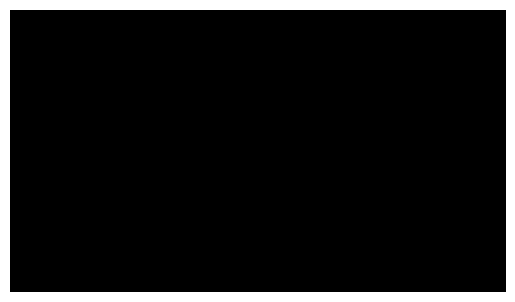

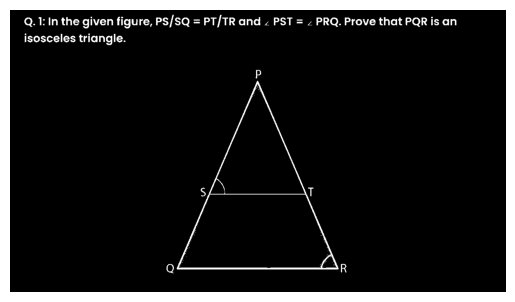

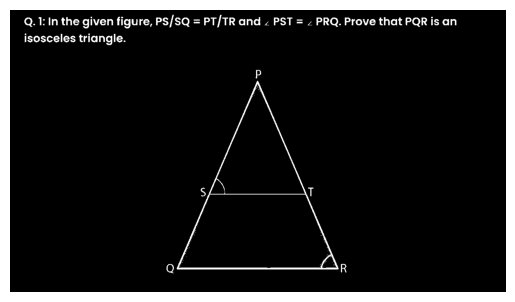

['temp_image\\element_4.png']


In [59]:
output_dir = 'temp_image'

def create_mask(image_shape, excluded_boxes):
    mask = np.zeros(image_shape, dtype=np.uint8)
    for box in excluded_boxes:
        x_tl, y_tl = box[0]
        x_br, y_br = box[2]
        mask[y_tl:y_br, x_tl:x_br] = 255
    return mask

image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

plt.imshow(image, cmap='grey')
plt.axis('off')
plt.show()
mask = create_mask(image.shape[:2], excluded_boxes)
inverted_mask = cv2.bitwise_not(mask)
plt.imshow(inverted_mask, cmap='grey')
plt.axis('off')
plt.show()
combined_mask = cv2.bitwise_and(binary, inverted_mask)
plt.imshow(combined_mask, cmap='grey')
plt.axis('off')
plt.show()
combined_mask = cv2.bitwise_and(binary, binary, mask=inverted_mask)
plt.imshow(combined_mask, cmap='grey')
plt.axis('off')
plt.show()
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

visual_elements = []
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)

    if w > 30 and h > 30:
        roi = image[y:y+h, x:x+w]
        element_path = os.path.join(output_dir, f'element_{i}.png')
        cv2.imwrite(element_path, roi)
        visual_elements.append(element_path)

print(visual_elements)

In [41]:
output_dir = 'temp_image'

image = cv2.imread("temp_image/mask_img.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

mask_to_exclude = cv2.inRange(image, np.array(uniq_color), np.array(uniq_color))
mask_to_exclude = cv2.bitwise_not(mask_to_exclude)
combined_mask = cv2.bitwise_and(binary, mask_to_exclude)
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
visual_elements = []
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)

    if w > 30 and h > 30:
        roi = image[y:y+h, x:x+w]
        element_path = os.path.join(output_dir, f'element_{i}.png')
        cv2.imwrite(element_path, roi)
        visual_elements.append(element_path)

print(visual_elements)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [31]:
temp = np.zeros((30, 30, 3))
cv2.imwrite(f"{output_dir}/temp.png",temp)

True

In [ ]:
extracted_text = texts[0].description if texts else ''
print(extracted_text)

with open(f"texts/{img_name}_text.txt", "w") as file:
    file.write(extracted_text)
file.close()

In [ ]:
def detect_document(image_path):
    """Detects document features in an image."""
    client = vision.ImageAnnotatorClient()

    with open(image_path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    response = client.document_text_detection(image=image)

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

    return response

In [ ]:
img_name = 'peakflo'
img_path = f'./images/{img_name}.png'

In [ ]:
response = detect_document(img_path)
print(response)

In [ ]:
complete_text = []
for page in response.full_text_annotation.pages:
    page_text = []
    for block in page.blocks:
        block_text = []
        for paragraph in block.paragraphs:
            para_text = []
            for word in paragraph.words:
                word_text = "".join([symbol.text for symbol in word.symbols])
                para_text.append(word_text)
            block_text.append(para_text)
        page_text.append(block_text)
    complete_text.append(page_text)

print(complete_text)

In [ ]:
def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = (
        "UNKNOWN",
        "VERY_UNLIKELY",
        "UNLIKELY",
        "POSSIBLE",
        "LIKELY",
        "VERY_LIKELY",
    )
    print("Faces:")

    for face in faces:
        print(f"anger: {likelihood_name[face.anger_likelihood]}")
        print(f"joy: {likelihood_name[face.joy_likelihood]}")
        print(f"surprise: {likelihood_name[face.surprise_likelihood]}")

        vertices = [
            f"({vertex.x},{vertex.y})" for vertex in face.bounding_poly.vertices
        ]

        print("face bounds: {}".format(",".join(vertices)))

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
